In [3]:
import numpy as np
import matplotlib.pyplot as plt

k=2e-7
acoll=5.8

## N = 9407

In [18]:
N=9407
N_int=9407-346   # number of internal particles

# load FIRE minimization results
FIRE_path='FIRE_out.txt'
g, init_en, fin_en= np.loadtxt(FIRE_path, unpack=True, usecols=(0,1,2))
delta_en=fin_en-init_en

# load Simulated Annealing results
SA_path='SA_out.txt'
g_SA, init_en_SA, fin_en_SA= np.loadtxt(SA_path, unpack=True, usecols=(0,1,2))
delta_en_SA=fin_en_SA-init_en_SA

# NOTE:
# data is loaded from a .txt file containing the results of minimization runs in the following format:
# g initial_energy final_energy
# These results are obtained from LAMMPS 'log' files resulting from each minimization

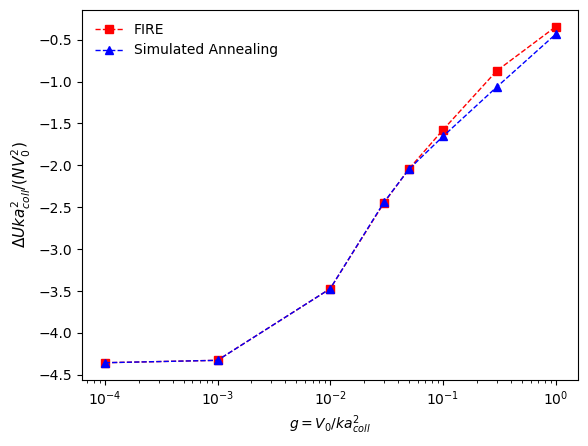

In [20]:
plt.xscale('log')   # log scale for x axis

plt.plot(g, delta_en/(k*acoll**2)/g**2/N_int,
         marker='s', linestyle='dashed', linewidth=1,
         label='FIRE', c='r')
plt.plot(g_SA, delta_en_SA/(k*acoll**2)/g_SA**2/N_int, linewidth=1,
         marker='^', linestyle='dashed',
         label='Simulated Annealing', c='b')

plt.xlabel(r'$ g=V_0/ka_{coll}^2$')
plt.ylabel(r'$\Delta U ka_{coll}^2/(N V_0^2)$', fontsize=11)
plt.legend(frameon=False)

plt.savefig("min_results.pdf",bbox_inches='tight')   # saves plot as pdf

plt.show()

In [32]:
# These print the graph data to a file, if needed

with open('FIRE_results.txt', "w") as outFile:
    for i in range(g.size):
        outFile.write(str(g[i]) + " "+str(delta_en[i]/(k*acoll**2)/g[i]**2/N_int)+"\n")

with open('SA_results.txt', "w") as outFile:
    for i in range(g.size):
        outFile.write(str(g[i]) + " "+str(delta_en_SA[i]/(k*acoll**2)/g[i]**2/N_int)+"\n")